### Importing Libraries & Dataset

In [5]:
import kagglehub
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import t
import sklearn as sk
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import make_scorer
from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc


import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Download latest version
path = kagglehub.dataset_download("abhinavmangalore/breast-cancer-dataset-wisconsin-diagnostic-uci")

print("Path to dataset files:", path)

Path to dataset files: /Users/allisonso/.cache/kagglehub/datasets/abhinavmangalore/breast-cancer-dataset-wisconsin-diagnostic-uci/versions/1


In [3]:
bcdf = pd.read_csv('breast-cancer-wisconsin-data.csv')
bcdf.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
# data preparation (replaced Malignant diagnoses with 1, Benign with 0)
df = bcdf.drop(columns=["id"])
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
#Data Preprocessing
train_data, test_data = train_test_split(df, test_size=171, random_state=0)
ytrain = train_data['diagnosis']
Xtrain = train_data.drop(columns=['diagnosis'])

model = Pipeline([
    ('sscaler', StandardScaler()),
    ('ridge', sk.linear_model.Ridge())
])

#polynomial expansion
polynomial = sk.preprocessing.PolynomialFeatures(degree=2)

XtrainBase = polynomial.fit_transform(Xtrain)
XtrainRadius = polynomial.fit_transform(Xtrain.drop(columns=['radius_mean']))
XtrainTexture = polynomial.fit_transform(Xtrain.drop(columns=['texture_mean']))
XtrainPerimeter = polynomial.fit_transform(Xtrain.drop(columns=['perimeter_mean']))
XtrainArea = polynomial.fit_transform(Xtrain.drop(columns=['area_mean']))
XtrainSmoothness = polynomial.fit_transform(Xtrain.drop(columns=['smoothness_mean']))
XtrainCompact = polynomial.fit_transform(Xtrain.drop(columns=['compactness_mean']))
XtrainConcavity = polynomial.fit_transform(Xtrain.drop(columns=['concavity_mean']))
XtrainConcave = polynomial.fit_transform(Xtrain.drop(columns=['concave points_mean']))
XtrainSymmetry = polynomial.fit_transform(Xtrain.drop(columns=['symmetry_mean']))

model.fit(XtrainBase,ytrain)
cvscores = cross_val_score(model, XtrainBase, ytrain, cv=10, scoring='neg_mean_squared_error')
mseBase = np.mean(-cvscores)
print(f"Mean MSE Training Set (Baseline): {mseBase}")

model.fit(XtrainRadius,ytrain)
cvscores = cross_val_score(model, XtrainRadius, ytrain, cv=10, scoring='neg_mean_squared_error')
mseRadius = np.mean(-cvscores)
print(f"Mean MSE Training Set (Radius): {mseRadius}")

model.fit(XtrainTexture,ytrain)
cvscores = cross_val_score(model, XtrainTexture, ytrain, cv=10, scoring='neg_mean_squared_error')
mseTexture = np.mean(-cvscores)
print(f"Mean MSE Training Set (Texture): {mseTexture}")

model.fit(XtrainPerimeter,ytrain)
cvscores = cross_val_score(model, XtrainPerimeter, ytrain, cv=10, scoring='neg_mean_squared_error')
msePerimeter = np.mean(-cvscores)
print(f"Mean MSE Training Set (Perimeter): {msePerimeter}")

model.fit(XtrainArea,ytrain)
cvscores = cross_val_score(model, XtrainArea, ytrain, cv=10, scoring='neg_mean_squared_error')
mseArea = np.mean(-cvscores)
print(f"Mean MSE Training Set (Area): {mseArea}")

model.fit(XtrainSmoothness,ytrain)
cvscores = cross_val_score(model, XtrainSmoothness, ytrain, cv=10, scoring='neg_mean_squared_error')
mseSmoothness = np.mean(-cvscores)
print(f"Mean MSE Training Set (Smoothness): {mseSmoothness}")

model.fit(XtrainCompact,ytrain)
cvscores = cross_val_score(model, XtrainCompact, ytrain, cv=10, scoring='neg_mean_squared_error')
mseCompact = np.mean(-cvscores)
print(f"Mean MSE Training Set (Compactness): {mseCompact}")

model.fit(XtrainConcavity,ytrain)
cvscores = cross_val_score(model, XtrainConcavity, ytrain, cv=10, scoring='neg_mean_squared_error')
mseConcavity = np.mean(-cvscores)
print(f"Mean MSE Training Set (Concavity): {mseConcavity}")

model.fit(XtrainConcave,ytrain)
cvscores = cross_val_score(model, XtrainConcave, ytrain, cv=10, scoring='neg_mean_squared_error')
mseConcave = np.mean(-cvscores)
print(f"Mean MSE Training Set (Concave Points): {mseConcave}")

model.fit(XtrainSymmetry,ytrain)
cvscores = cross_val_score(model, XtrainSymmetry, ytrain, cv=10, scoring='neg_mean_squared_error')
mseSymmetry = np.mean(-cvscores)
print(f"Mean MSE Training Set (Symmetry): {mseSymmetry}")

Mean MSE Training Set (Baseline): 0.17399593699930077
Mean MSE Training Set (Radius): 0.17328651276315302
Mean MSE Training Set (Texture): 0.15967663373505048
Mean MSE Training Set (Perimeter): 0.17395926527154987
Mean MSE Training Set (Area): 0.1651879130211905
Mean MSE Training Set (Smoothness): 0.1720455873264371
Mean MSE Training Set (Compactness): 0.16864723924798036
Mean MSE Training Set (Concavity): 0.19582789647431262
Mean MSE Training Set (Concave Points): 0.17044256877891056
Mean MSE Training Set (Symmetry): 0.18539093722149896


In [8]:
# Feature Selection: Subset Selection
XtrainBase = polynomial.fit_transform(Xtrain)
XtrainAll = polynomial.fit_transform(Xtrain.drop(columns=['texture_mean', 'area_mean', 'compactness_mean','concave points_mean', 'smoothness_mean', 'radius_mean']))
XtrainBest = polynomial.fit_transform(Xtrain.drop(columns=['texture_mean', 'area_mean', 'compactness_mean']))
XtrainWorst = polynomial.fit_transform(Xtrain.drop(columns=['perimeter_mean', 'symmetry_mean', 'concavity_mean']))

model.fit(XtrainBase,ytrain)
cvscores = cross_val_score(model, XtrainBase, ytrain, cv=10, scoring='neg_mean_squared_error')
mseBase = np.mean(-cvscores)
print(f"Mean MSE Training Set (Baseline): {mseBase}")

model.fit(XtrainAll,ytrain)
cvscores = cross_val_score(model, XtrainAll, ytrain, cv=10, scoring='neg_mean_squared_error')
mseAll = np.mean(-cvscores)
print(f"Mean MSE Training Set (All low MSE - removed): {mseAll}")

model.fit(XtrainBest,ytrain)
cvscores = cross_val_score(model, XtrainBest, ytrain, cv=10, scoring='neg_mean_squared_error')
mseBest = np.mean(-cvscores)
print(f"Mean MSE Training Set (3 Lowest MSE - removed): {mseBest}")

model.fit(XtrainWorst,ytrain)
cvscores = cross_val_score(model, XtrainWorst, ytrain, cv=10, scoring='neg_mean_squared_error')
mseWorst = np.mean(-cvscores)
print(f"Mean MSE Training Set (3 Highest MSE - removed): {mseWorst}")

Mean MSE Training Set (Baseline): 0.17399593699930077
Mean MSE Training Set (All low MSE - removed): 0.13947448201201962
Mean MSE Training Set (3 Lowest MSE - removed): 0.1474969780258763
Mean MSE Training Set (3 Highest MSE - removed): 0.20556152979940573


### Model Selection

In [5]:
# linear Model (Assignment 1)
## predict, lossRSS, fit, lossLAD, 
## Bootstrap: predict, CI, (Assignment 4)
# OLS Model (linear_model.LinearRegression())

# poissonNegLogLikelihood (Assignment 2)
## regression, predict, fit

# logistic Regression (Assignment 3)
## no penalty and l2 penalty: fit, predict, predict_proba


## extra
#Support vector machine (SVM)
#K-means
#K-nearest neighbor (KNN)
#Random forest (**)
#Decision tree
#Naive Bayes


### Data Visualization

In [6]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


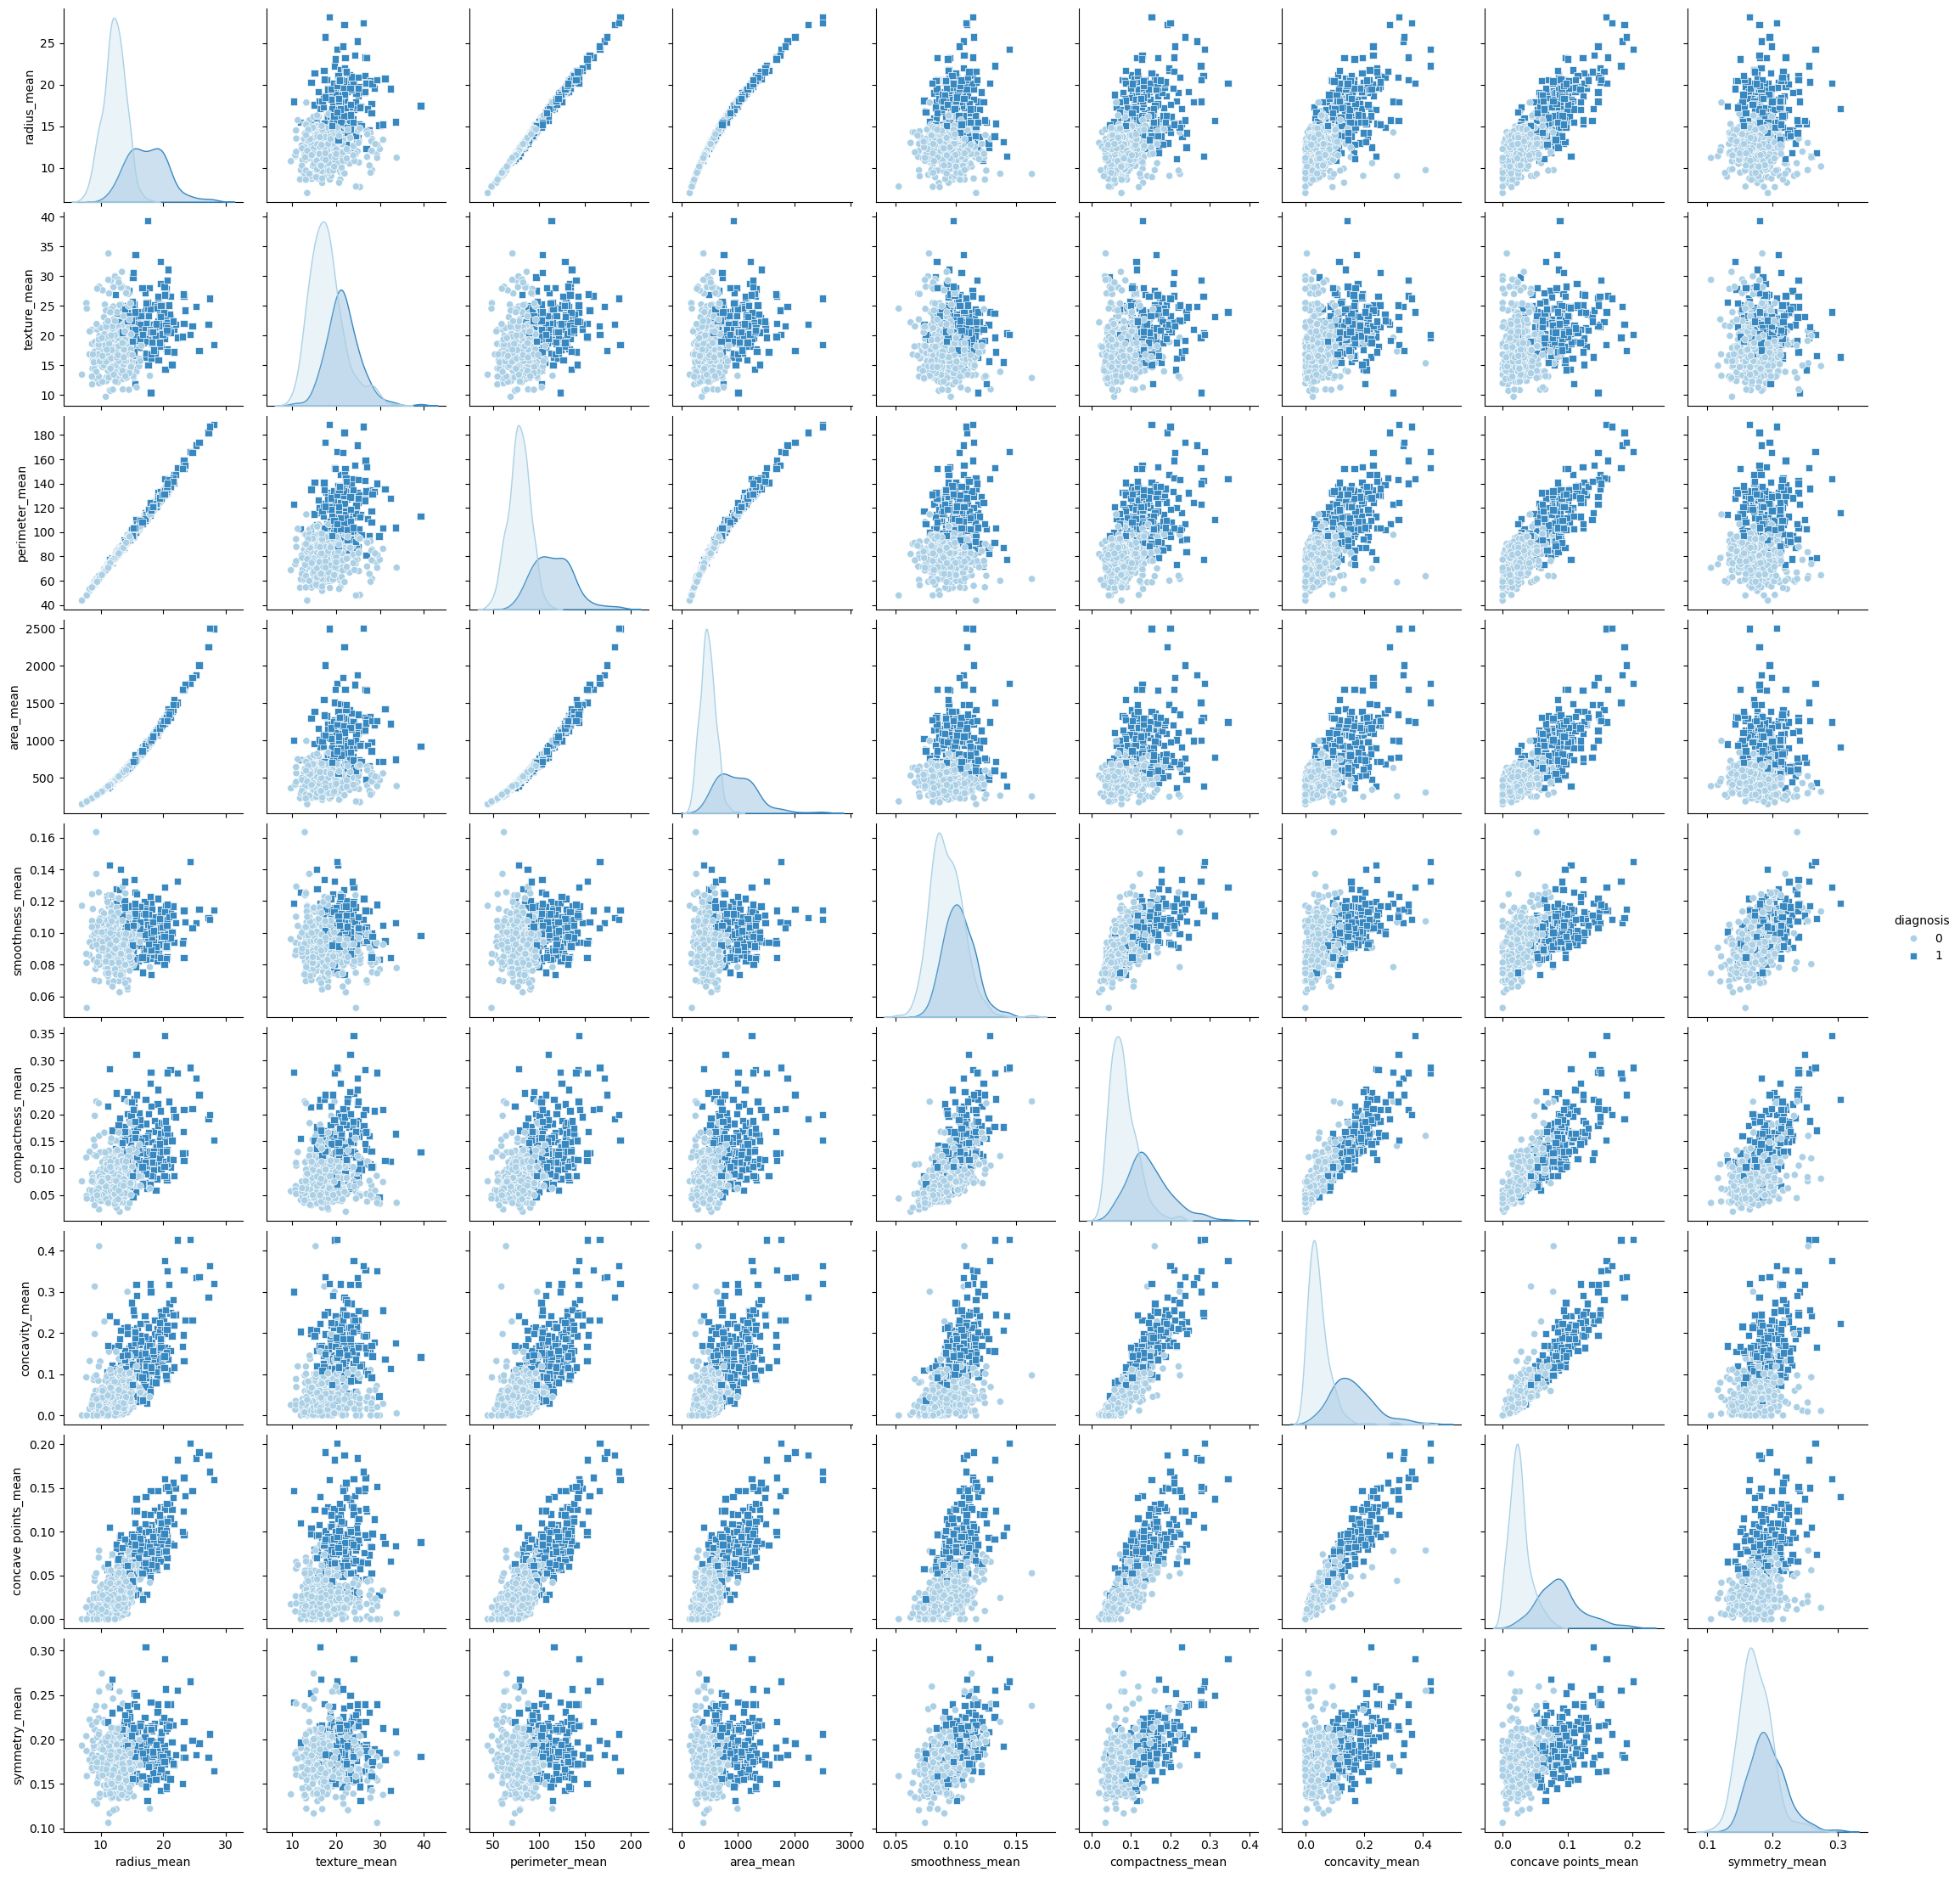

In [7]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
# Create a pairplot
#sns.pairplot(df, hue='diagnosis', markers=["o", "s", "D"], palette="Set2")
columns = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean','concavity_mean', 'concave points_mean','symmetry_mean','diagnosis']  # replace with your relevant column names
sns.pairplot(df[columns], hue='diagnosis', markers=["o", "s"], palette="Blues")
#sns.pairplot(df, hue='diagnosis', markers=["o", "s", "D"], palette="Set2")
plt.show()


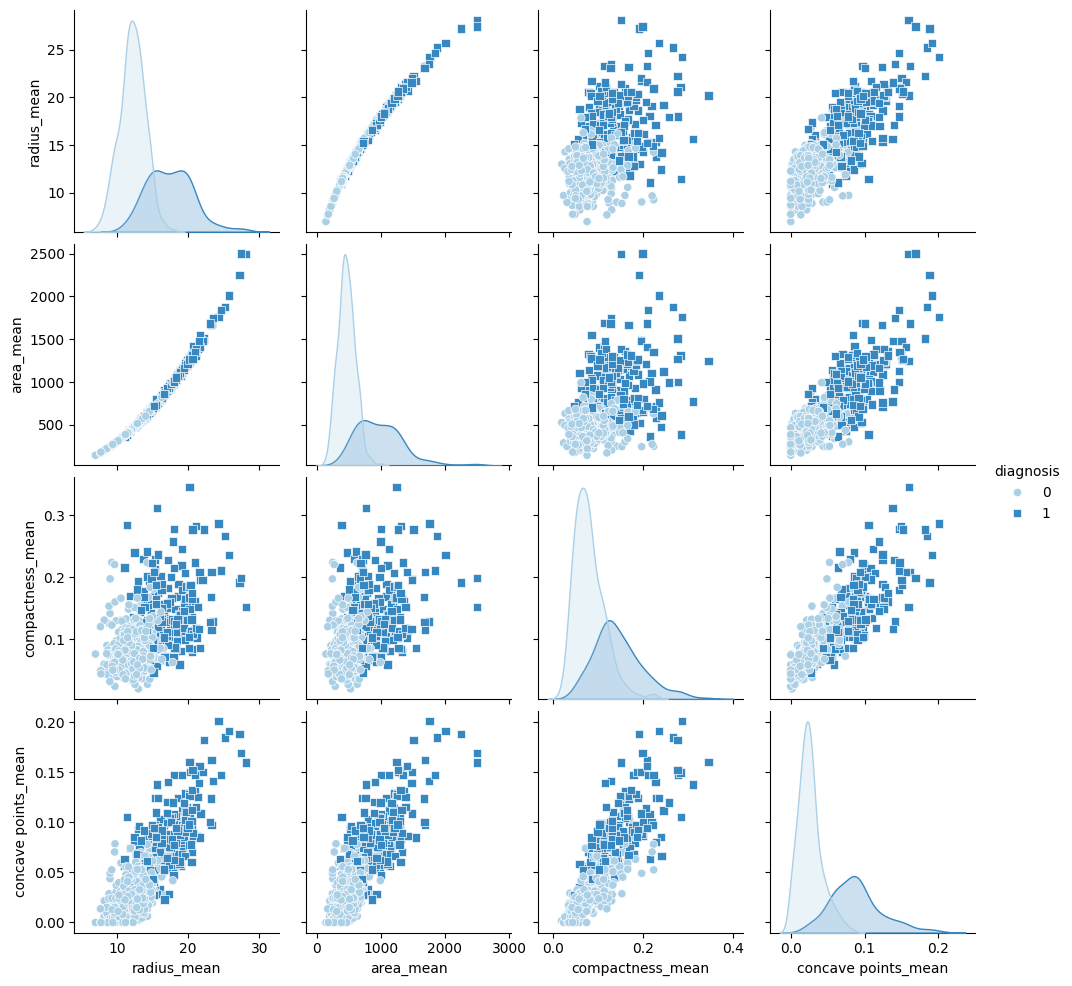

In [8]:
columns = ['radius_mean', 'area_mean', 'compactness_mean','concave points_mean','diagnosis']  # replace with your relevant column names
sns.pairplot(df[columns], hue='diagnosis', markers=["o", "s"], palette="Blues")
#sns.pairplot(df, hue='diagnosis', markers=["o", "s", "D"], palette="Set2")
plt.show()

In [10]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# Heat map of all included features
col1 = ['diagnosis', 'radius_mean', 'perimeter_mean', 'smoothness_mean','concavity_mean', 'concave points_mean','symmetry_mean']
corr_matrix = df[col1].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, cmap="Blues", vmin = 0, vmax = 1, center = 0.5, annot=True, fmt=".2f", square=True, linewidths=.5)
plt.show()

In [ ]:
# Heat map for most relevant predictors
col2 = ['diagnosis', 'perimeter_mean', 'concavity_mean', 'symmetry_mean']
corr_matrix = df[col2].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, cmap="Blues", vmin=0, vmax=1, center=0.5, annot=True, fmt=".2f", square="True", linewdiths=.5)
plt.show()

In [ ]:
# Box plots for most relevant predictors corresponding to diagnosis
df['diagnosis_label'] = df['diagnosis'].map({1: 'Malignant', 0: 'Benign'})
col3 = ['perimeter_mean', 'concavity_mean', 'symmetry_mean']

num_plots = len(col3)
cols = 3
rows = (num_plots // cols) + (num_plots % cols > 0) 

fig, axes = plt.subplots(rows, cols, figsize=(6 * cols, 5 * rows))
axes = axes.flatten() 

for i, col in enumerate(col3):
    sns.boxplot(x=df["diagnosis_label"], y=df[col], linewidth=1.2, ax=axes[i]) 
    sns.stripplot(x=df["diagnosis_label"], y=df[col], color='black', alpha=0.5, jitter=True, ax=axes[i])

    axes[i].set_xlabel("Diagnosis", fontsize=14)
    axes[i].set_ylabel(col, fontsize=14)

    axes[i].tick_params(axis="both", labelsize=12)

plt.tight_layout()
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.show()

### Model Fitting

**Data Processing**

The dataset is being split into two features, X and y, where X contains all columns except diagnosis and y holds the diagnosis label. We use train_test_split() to divde the data into training and testing sets, with 50% allocated to each. The training set is used to fit the model and the test set evaluates the model's performance. 


In [40]:
X = df.drop('diagnosis', axis='columns')
X2 = X.drop(['smoothness_mean', 'symmetry_mean', 'texture_mean', 
             'fractal_dimension_worst', 'smoothness_worst', 
             'symmetry_worst', 'texture_worst'], axis='columns')
y = df.diagnosis.values
# Splitting code here
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.5, random_state=0)
Xtrain2, Xtest2, ytrain2, ytest2 = train_test_split(X2, y, test_size=0.5, random_state=0)

Model Comparison

In [41]:
def mse(y,ypred):
    return np.mean((y-ypred)**2)

In [42]:
# Linear model
from sklearn.model_selection import train_test_split, cross_val_score, KFold
linmodel = LinearRegression().fit(Xtrain,ytrain)
trainloss = mse(ytrain,linmodel.predict(Xtrain))
print(f"Training loss: {trainloss}")
testloss = mse(ytest,linmodel.predict(Xtest))
print(f"Testing loss: {testloss}")

linmodel = LinearRegression().fit(Xtrain2,ytrain2)
trainloss = mse(ytrain2,linmodel.predict(Xtrain2))
print(f"Training loss 2: {trainloss}")
testloss = mse(ytest2,linmodel.predict(Xtest2))
print(f"Testing loss 2: {testloss}")

kf = KFold(n_splits=5,shuffle=False)
sc = make_scorer(mse)
cv_scores = cross_val_score(linmodel, Xtrain, ytrain, cv=kf, scoring=sc)
print(f"CV loss: {cv_scores.mean()}")

Training loss: 0.046826082002163635
Testing loss: 0.07091520227073217
Training loss 2: 0.04980446047942981
Testing loss 2: 0.06785944160965585
CV loss: 0.06377360884845197


In [43]:
# Logistic Regression
DFLR = LogisticRegression(penalty='l2',max_iter=1000000)
dflr = DFLR.fit(Xtrain,ytrain)

# Extract coefficients and feature names
#coefficients = dflr.coef_[0]  # Get the coefficients (array of shape (n_features,))
#feature_names = Xtrain.columns  # Assuming X_train is a DataFrame

trainloss = mse(ytrain,dflr.predict(Xtrain))
print(f"Training loss: {trainloss}")
testloss = mse(ytest,dflr.predict(Xtest))
print(f"Testing loss: {testloss}")

#print(f"Coefficient for Age: {dflr.coef_[0][1]}")
#print(f"Intercept: {dflr.intercept_}")

dflr = DFLR.fit(Xtrain2,ytrain2)
trainloss = mse(ytrain2,dflr.predict(Xtrain2))
print(f"Training loss 2: {trainloss}")
testloss = mse(ytest2,dflr.predict(Xtest2))
print(f"Testing loss 2: {testloss}")

kf = KFold(n_splits=5,shuffle=False)
sc = make_scorer(mse)
cv_scores = cross_val_score(dflr, Xtrain, ytrain, cv=kf, scoring=sc)
print(f"CV loss: {cv_scores.mean()}")

Training loss: 0.03873239436619718
Testing loss: 0.042105263157894736
Training loss 2: 0.04225352112676056
Testing loss 2: 0.0456140350877193
CV loss: 0.05281954887218045


In [17]:
#K-nearest neighbor (KNN)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(Xtrain, ytrain)
# Make predictions
predictions = knn.predict(Xtest)

# Check accuracy
accuracy = knn.score(Xtest, ytest)
print('Accuracy:', accuracy)

# Make predictions
trainloss = mse(ytrain,knn.predict(Xtrain))
print(f"Training loss: {trainloss}")
testloss = mse(ytest,knn.predict(Xtest))
print(f"Testing loss: {testloss}")

kf = KFold(n_splits=5,shuffle=False)
sc = make_scorer(mse)
cv_scores = cross_val_score(knn, Xtrain, ytrain, cv=kf, scoring=sc)
print(f"CV loss: {cv_scores.mean()}")

Accuracy: 0.9298245614035088
Training loss: 0.045774647887323945
Testing loss: 0.07017543859649122
CV loss: 0.07399749373433584


In [18]:
#Random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
# Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(Xtrain, ytrain)
# Make predictions
predictions = rf.predict(Xtest)

# Check accuracy
accuracy = rf.score(Xtest, ytest)
print('Accuracy:', accuracy)
# Make predictions
trainloss = mse(ytrain,rf.predict(Xtrain))
print(f"Training loss: {trainloss}")
testloss = mse(ytest,rf.predict(Xtest))
print(f"Testing loss: {testloss}")

kf = KFold(n_splits=5,shuffle=False)
sc = make_scorer(mse)
cv_scores = cross_val_score(rf, Xtrain, ytrain, cv=kf, scoring=sc)
print(f"CV loss: {cv_scores.mean()}")

Accuracy: 0.9438596491228071
Training loss: 0.0
Testing loss: 0.056140350877192984
CV loss: 0.04918546365914787


In [19]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(Xtrain, ytrain)
# Check accuracy
accuracy = dt.score(Xtest, ytest)
print('Accuracy:', accuracy)
trainloss = mse(ytrain,dt.predict(Xtrain))
print(f"Training loss: {trainloss}")
testloss = mse(ytest,dt.predict(Xtest))
print(f"Testing loss: {testloss}")

kf = KFold(n_splits=5,shuffle=False)
sc = make_scorer(mse)
cv_scores = cross_val_score(rf, Xtrain, ytrain, cv=kf, scoring=sc)
print(f"CV loss: {cv_scores.mean()}")

Accuracy: 0.9298245614035088
Training loss: 0.0
Testing loss: 0.07017543859649122
CV loss: 0.04918546365914787


In [20]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
# Naive Bayes model
nb = GaussianNB()
nb.fit(Xtrain, ytrain)
# Check accuracy
accuracy = nb.score(Xtest, ytest)
print('Accuracy:', accuracy)
trainloss = mse(ytrain,nb.predict(Xtrain))
print(f"Training loss: {trainloss}")
testloss = mse(ytest,nb.predict(Xtest))
print(f"Testing loss: {testloss}")

kf = KFold(n_splits=5,shuffle=False)
sc = make_scorer(mse)
cv_scores = cross_val_score(nb, Xtrain, ytrain, cv=kf, scoring=sc)
print(f"CV loss: {cv_scores.mean()}")

Accuracy: 0.9368421052631579
Training loss: 0.04929577464788732
Testing loss: 0.06315789473684211
CV loss: 0.06340852130325814


In [25]:

from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [26]:
#Decision tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(Xtrain, ytrain)
# Check accuracy
accuracy = dt.score(Xtest, ytest)
print('Accuracy:', accuracy)
trainloss = mse(ytrain,dt.predict(Xtrain))
print(f"Training loss: {trainloss}")
testloss = mse(ytest,dt.predict(Xtest))
print(f"Testing loss: {testloss}")

kf = KFold(n_splits=5,shuffle=False)
sc = make_scorer(mse)
cv_scores = cross_val_score(rf, Xtrain, ytrain, cv=kf, scoring=sc)
print(f"CV loss: {cv_scores.mean()}")

Accuracy: 0.9298245614035088
Training loss: 0.0
Testing loss: 0.07017543859649122
CV loss: 0.04918546365914787


In [37]:
# XGBoost
xgb = XGBClassifier(n_estimators=500, max_depth=3, learning_rate=0.1)
xgb.fit(Xtrain, ytrain)
# Check accuracy
accuracy = xgb.score(Xtest, ytest)
print('Accuracy:', accuracy)
trainloss = mse(ytrain,xgb.predict(Xtrain))
print(f"Training loss: {trainloss}")
testloss = mse(ytest,xgb.predict(Xtest))
print(f"Testing loss: {testloss}")

kf = KFold(n_splits=5,shuffle=False)
sc = make_scorer(mse)
cv_scores = cross_val_score(rf, Xtrain, ytrain, cv=kf, scoring=sc)
print(f"CV loss: {cv_scores.mean()}")

Accuracy: 0.9508771929824561
Training loss: 0.0
Testing loss: 0.04912280701754386
CV loss: 0.04918546365914787


In [31]:
def run_simulation(X_train,y_train,X_test,y_test):
   
     # Initialize models
    # 1. Bagged Decision Tree
    bagged_tree = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=500)
    
    # 2. Random Forest with max_features=1
    rf_max1 = RandomForestClassifier(n_estimators=500, max_features=1)
    
    # 3. Random Forest with max_features=3
    rf_max3 = RandomForestClassifier(n_estimators=500, max_features=3)
    
    # 4. Custom classifier, Random Forest with max_features=5
    xgb_classifier = XGBClassifier(n_estimators=500, max_depth=3, learning_rate=0.1)
    
    # Train and evaluate each model, storing accuracy for each
    bagged_tree.fit(X_train, y_train)
    bag_accuracy = accuracy_score(y_test, bagged_tree.predict(X_test))
    
    rf_max1.fit(X_train, y_train)
    rf_mf1_accuracy = accuracy_score(y_test, rf_max1.predict(X_test))
    
    rf_max3.fit(X_train, y_train)
    rf_mf3_accuracy = accuracy_score(y_test, rf_max3.predict(X_test))
    
    xgb_classifier.fit(X_train, y_train)
    xgb_accuracy = accuracy_score(y_test, xgb_classifier.predict(X_test))
    
    # Return the accuracy values
    return bag_accuracy, rf_mf1_accuracy, rf_mf3_accuracy, xgb_accuracy

run_simulation(Xtrain,ytrain,Xtest,ytest)

(0.9473684210526315,
 0.9298245614035088,
 0.9368421052631579,
 0.9508771929824561)

### Model Evaluation



In [51]:
def compute_performance(yhat, y, classes):
    # First, get tp, tn, fp, fn
    tp = sum(np.logical_and(yhat == classes[1], y == classes[1]))
    tn = sum(np.logical_and(yhat == classes[0], y == classes[0]))
    fp = sum(np.logical_and(yhat == classes[1], y == classes[0]))
    fn = sum(np.logical_and(yhat == classes[0], y == classes[1]))

    print(f"tp: {tp} tn: {tn} fp: {fp} fn: {fn}")
    
    # Accuracy
    acc = (tp + tn) / (tp + tn + fp + fn)
    
    # Precision
    # "Of the ones I labeled +, how many are actually +?"
    precision = tp / (tp + fp)
    
    # Recall
    # "Of all the + in the data, how many do I correctly label?"
    recall = tp / (tp + fn)    
    
    # Sensitivity
    # "Of all the + in the data, how many do I correctly label?"
    sensitivity = recall
    
    # Specificity
    # "Of all the - in the data, how many do I correctly label?"
    specificity = tn / (fp + tn)
    
    # Print results
    
    print("Accuracy:",round(acc,3),"Recall:",round(recall,3),"Precision:",round(precision,3),
          "Sensitivity:",round(sensitivity,3),"Specificity:",round(specificity,3))
    
## Evaluate linear regression
print("For Logistic Regression")
dflr = DFLR.fit(Xtrain,ytrain)
# Predict probabilities using the totChol-only model
yprob = dflr.predict_proba(Xtest)[:, 1]  # Probabilities for the positive class
# Apply the threshold of 0.5 to get predicted labels (1 if >= 0.5, otherwise 0)
yhat = (yprob >= 0.2).astype(int)
compute_performance(yhat,ytest,classes=[0, 1])

## Q1
# Count the number of instances labeled as positive (1)
num_positives = sum(yhat)
print(f"Number of test instances labeled positive: {num_positives}")

print('')
print("For Random Forrest XGBoost:")
## Evaluate Random forrest
XGB = XGBClassifier(n_estimators=500, max_depth=3, learning_rate=0.1)
xgb = XGB.fit(Xtrain,ytrain)
# Predict probabilities using the totChol-only model
yprob = xgb.predict_proba(Xtest)[:, 1]  # Probabilities for the positive class
# Apply the threshold of 0.5 to get predicted labels (1 if >= 0.5, otherwise 0)
yhat = (yprob >= 0.2).astype(int)
compute_performance(yhat,ytest,classes=[0, 1])

## Q1
# Count the number of instances labeled as positive (1)
num_positives = sum(yhat)
print(f"Number of test instances labeled positive: {num_positives}")



For Logistic Regression
tp: 98 tn: 165 fp: 19 fn: 3
Accuracy: 0.923 Recall: 0.97 Precision: 0.838 Sensitivity: 0.97 Specificity: 0.897
Number of test instances labeled positive: 117

For Random Forrest XGBoost:
tp: 96 tn: 177 fp: 7 fn: 5
Accuracy: 0.958 Recall: 0.95 Precision: 0.932 Sensitivity: 0.95 Specificity: 0.962
Number of test instances labeled positive: 103


In [54]:
import numpy as np
import pandas as pd

def compute_performance(yhat, y, classes):
    # Calculate TP, TN, FP, FN
    tp = sum(np.logical_and(yhat == classes[1], y == classes[1]))
    tn = sum(np.logical_and(yhat == classes[0], y == classes[0]))
    fp = sum(np.logical_and(yhat == classes[1], y == classes[0]))
    fn = sum(np.logical_and(yhat == classes[0], y == classes[1]))

    # Confusion matrix display using a DataFrame
    confusion_matrix = pd.DataFrame({
        "Predicted Positive": [tp, fp],
        "Predicted Negative": [fn, tn]
    }, index=["Actual Positive", "Actual Negative"])

    print("\nConfusion Matrix:")
    print(confusion_matrix)

    # Calculate metrics
    acc = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    sensitivity = recall
    specificity = tn / (fp + tn) if (fp + tn) > 0 else 0

    # Display metrics with rounded values
    print("\nMetrics:")
    print(f"Accuracy: {acc:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Sensitivity: {sensitivity:.3f}")
    print(f"Specificity: {specificity:.3f}")


# Model fitting and predictions
print("For Logistic regression")
dflr = DFLR.fit(Xtrain, ytrain)
yprob = dflr.predict_proba(Xtest)[:, 1]
yhat = (yprob >= 0.2).astype(int)

# Compute performance
compute_performance(yhat, ytest, classes=[0, 1])

# Additional information: Count of positive labels
num_positives = sum(yhat)
print(f"\nNumber of test instances labeled positive: {num_positives}")



For Logistic regression

Confusion Matrix:
                 Predicted Positive  Predicted Negative
Actual Positive                  98                   3
Actual Negative                  19                 165

Metrics:
Accuracy: 0.923
Recall: 0.970
Precision: 0.838
Sensitivity: 0.970
Specificity: 0.897

Number of test instances labeled positive: 117


In [55]:
print("For Random Forrest Tree")
xgb = XGB.fit(Xtrain, ytrain)
yprob = xgb.predict_proba(Xtest)[:, 1]
yhat = (yprob >= 0.2).astype(int)

# Compute performance
compute_performance(yhat, ytest, classes=[0, 1])

# Additional information: Count of positive labels
num_positives = sum(yhat)
print(f"\nNumber of test instances labeled positive: {num_positives}")

For Random Forrest Tree

Confusion Matrix:
                 Predicted Positive  Predicted Negative
Actual Positive                  96                   5
Actual Negative                   7                 177

Metrics:
Accuracy: 0.958
Recall: 0.950
Precision: 0.932
Sensitivity: 0.950
Specificity: 0.962

Number of test instances labeled positive: 103


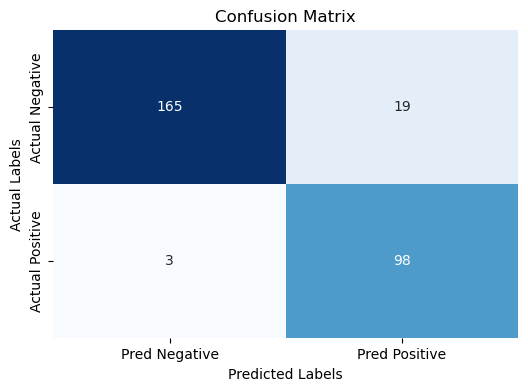


Performance Metrics:
Accuracy:    0.923
Precision:   0.838
Recall:      0.970
F1 Score:    0.899
Sensitivity: 0.970
Specificity: 0.897


In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

def compute_performance(yhat, y, classes):
    # Confusion matrix calculations
    cm = confusion_matrix(y, yhat, labels=classes)
    tn, fp, fn, tp = cm.ravel()  # Extracting tn, fp, fn, tp

    # Visualize the confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, 
                xticklabels=["Pred Negative", "Pred Positive"], 
                yticklabels=["Actual Negative", "Actual Positive"])
    plt.xlabel("Predicted Labels")
    plt.ylabel("Actual Labels")
    plt.title("Confusion Matrix")
    plt.show()

    # Metric calculations
    acc = accuracy_score(y, yhat)
    precision = precision_score(y, yhat, pos_label=classes[1])
    recall = recall_score(y, yhat, pos_label=classes[1])
    f1 = f1_score(y, yhat, pos_label=classes[1])
    sensitivity = recall
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

    # Display metrics
    print("\nPerformance Metrics:")
    print(f"Accuracy:    {acc:.3f}")
    print(f"Precision:   {precision:.3f}")
    print(f"Recall:      {recall:.3f}")
    print(f"F1 Score:    {f1:.3f}")
    print(f"Sensitivity: {sensitivity:.3f}")
    print(f"Specificity: {specificity:.3f}")

# Model fitting and predictions
dflr = DFLR.fit(Xtrain, ytrain)
yprob = dflr.predict_proba(Xtest)[:, 1]
yhat = (yprob >= 0.2).astype(int)

# Compute performance
compute_performance(yhat, ytest, classes=[0, 1])

# Additional inf


In [63]:
# ROC for all-variable classifier
yprob_full = dflr.predict_proba(Xtest)[:, 1]  # Get predicted probabilities for class 1
fpr, tpr, _ = roc_curve(ytest, yprob_full)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f"Full Feature Classifier (AUROC = {roc_auc:.3f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
print(f"AUROC: {roc_auc:.3f}")

AUROC: 0.994


In [59]:
# PRC for all-variable classifier
precision, recall, _ = precision_recall_curve(ytest, yprob_full)
plt.plot(recall, precision, label='Full Feature Classifier')
plt.xlabel("Recall")
plt.ylabel("Precision")
auc_full = auc(recall, precision)
print(f"Precision-Recall AUC for Full Feature classifier: {auc_full:.3f}")

Precision-Recall AUC for Full Feature classifier: 0.990


### Cross Validation

In [61]:
# Define Kfold crossvalidation with random shuffling
from sklearn.model_selection import KFold
x=np.arange(20)
kf = KFold(n_splits=5,shuffle=True)
for train,test in kf.split(x):
    print("%s %s" % (train, test))

[ 0  1  2  3  4  5  7  8  9 10 12 13 14 15 18 19] [ 6 11 16 17]
[ 0  2  3  4  5  6  7  9 10 11 12 13 14 16 17 19] [ 1  8 15 18]
[ 0  1  2  3  4  5  6  7  8  9 10 11 15 16 17 18] [12 13 14 19]
[ 0  1  4  6  7  8  9 11 12 13 14 15 16 17 18 19] [ 2  3  5 10]
[ 1  2  3  5  6  8 10 11 12 13 14 15 16 17 18 19] [0 4 7 9]


In [62]:
# Check CV loss
kf = KFold(n_splits=5,shuffle=False)
sc = make_scorer(mse)
cv_scores = cross_val_score(LinearRegression(), X, y, cv=kf, scoring=sc)

print(cv_scores)
print(f"CV loss: {cv_scores.mean()}")

cv_scores = cross_val_score(LinearRegression(), X2, y, cv=kf, scoring=sc)

print(cv_scores)
print(f"CV loss: {cv_scores.mean()}")






[0.09059669 0.07377714 0.05558921 0.04305204 0.05811857]
CV loss: 0.06422672975868392
[0.09728656 0.07683135 0.05378645 0.0402097  0.05751361]
CV loss: 0.0651255345750753
